In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix
from tensorflow.keras.datasets import imdb
import nltk

In [24]:
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [25]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [26]:
train_labels[0]

1

In [27]:
max([max(sequence) for sequence in train_data])

9999

In [28]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in 
word_index.items()])
# We decode the review; indices are offset by 3
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') 
for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [29]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [31]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
# Create an all-zero matrix of shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data) 

In [32]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [33]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.compile(optimizer='sgd',
loss='binary_crossentropy',
metrics=['accuracy'])

In [37]:
def loss(X, Y):
  return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(combine_inputs(X), Y))

In [38]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [39]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 86ms/step - loss: 0.6931 - accuracy: 0.4958 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 8/20
30

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

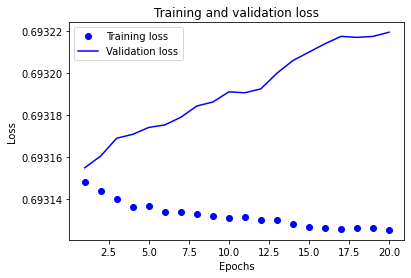

In [42]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=45,
batch_size=256,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/45
59/59 [==============================] - 3s 45ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 2/45
59/59 [==============================] - 2s 27ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 3/45
59/59 [==============================] - 1s 16ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 4/45
59/59 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 5/45
59/59 [==============================] - 1s 16ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 6/45
59/59 [==============================] - 1s 13ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 7/45
59/59 [==============================] - 1s 13ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 8/45
59

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [46]:
lambda2 = 0.01
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(lambda2), input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(lambda2) ))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=[tf.keras.metrics.Accuracy()])

history = model.fit(partial_x_train,
partial_y_train, epochs=140, batch_size=256, validation_data=(x_val, y_val))

Epoch 1/140
59/59 [==============================] - 1s 18ms/step - loss: 1.1756 - accuracy: 0.0000e+00 - val_loss: 1.1698 - val_accuracy: 0.0000e+00
Epoch 2/140
59/59 [==============================] - 1s 14ms/step - loss: 1.1643 - accuracy: 0.0000e+00 - val_loss: 1.1587 - val_accuracy: 0.0000e+00
Epoch 3/140
59/59 [==============================] - 1s 14ms/step - loss: 1.1533 - accuracy: 0.0000e+00 - val_loss: 1.1478 - val_accuracy: 0.0000e+00
Epoch 4/140
59/59 [==============================] - 1s 14ms/step - loss: 1.1426 - accuracy: 0.0000e+00 - val_loss: 1.1372 - val_accuracy: 0.0000e+00
Epoch 5/140
59/59 [==============================] - 1s 13ms/step - loss: 1.1321 - accuracy: 0.0000e+00 - val_loss: 1.1269 - val_accuracy: 0.0000e+00
Epoch 6/140
59/59 [==============================] - 1s 16ms/step - loss: 1.1218 - accuracy: 0.0000e+00 - val_loss: 1.1167 - val_accuracy: 0.0000e+00
Epoch 7/140
59/59 [==============================] - 1s 16ms/step - loss: 1.1118 - accuracy: 0.0000e

In [50]:
#import data
pima_df = pd.read_csv("pima-indians-diabetes.csv",header=0)
#remove space after Gluccose header and make lowercase (personal preference)
pima_df.columns = pima_df.columns.str.replace(' ', '')
pima_df.columns = pima_df.columns.str.lower()
pima_df.head()

,times_pregnant,glucose,blood_pressure,skin_thickness,serum_insulin,body_mass_index,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefe76a5ad0>,
      dtype=object)

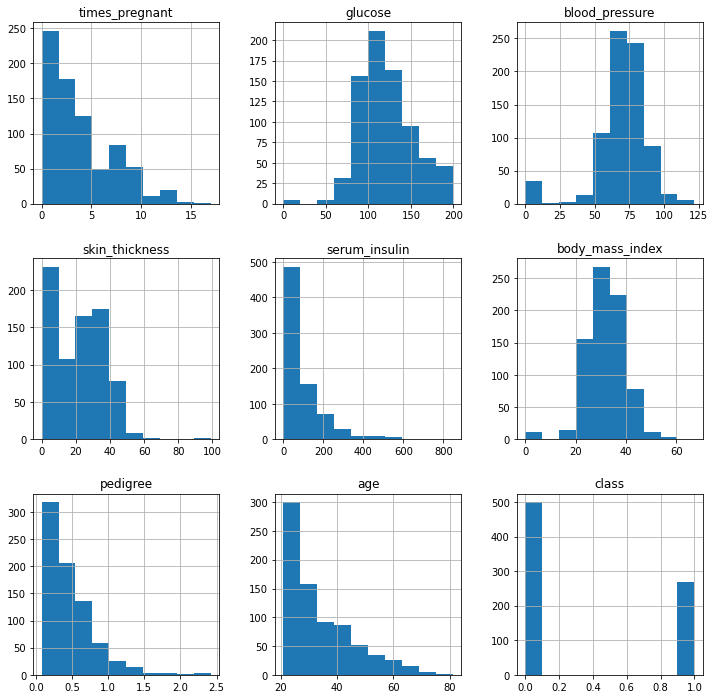

In [52]:
pima_df.hist(figsize=(12, 12))

In [53]:
#replace 0 with nulls in glucose, blood_pressure, and BMI so we can mean impute easily
pima_df[['glucose','blood_pressure','body_mass_index']] = \
pima_df[['glucose','blood_pressure','body_mass_index']].replace(0,np.nan)

# fetch feature column names
x_columns = pima_df.columns[0:8]

In [54]:
# split data into inputs, features (x) and output,labels (y)
# the first 8 columns represent features and the last column represent labels
x = pima_df.iloc[:,0:8]
y = pima_df.iloc[:,8]

In [55]:
# split into training and validation data using sklearn.model_selection.train_test_split()
# validation data are 20% of all data.
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=.2,random_state=7,stratify=y)

# We use sklearn.impute.SimpleImputer class to replace null values with averages
imp = SimpleImputer(strategy='mean')
x_train = pd.DataFrame(imp.fit_transform(x_train),columns = x_columns)
x_val = pd.DataFrame(imp.transform(x_val),columns = x_columns)

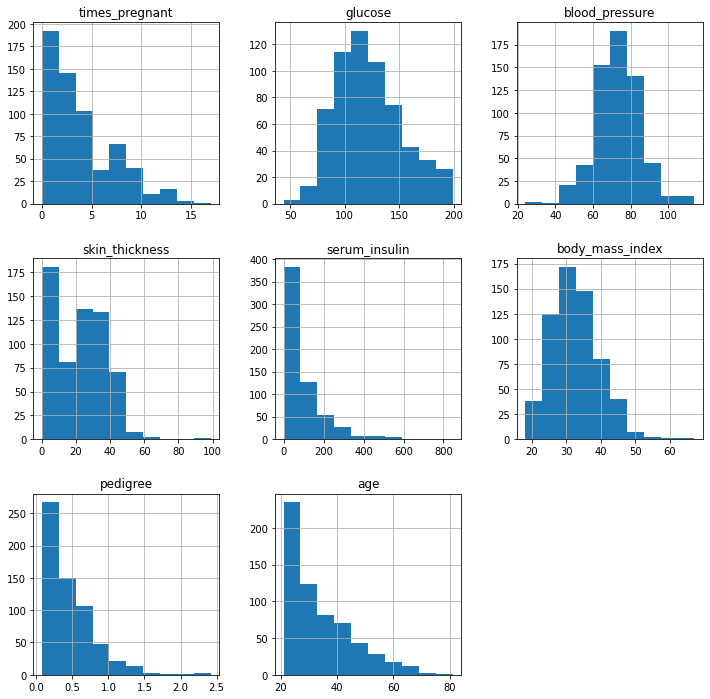

In [56]:
# examine modified data. Outliers with zero values shoudl disapear
x_train.hist(figsize=(12, 12));

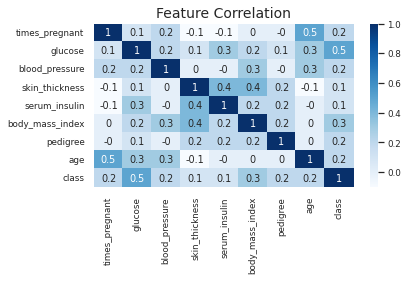

In [58]:
corr = pima_df.corr().round(1)
sns.set(font_scale=0.8)
sns.heatmap(corr, annot=True, cmap="Blues",
        xticklabels=pima_df.columns.values,
        yticklabels=pima_df.columns.values)
plt.title('Feature Correlation', fontsize=14)
plt.tight_layout()

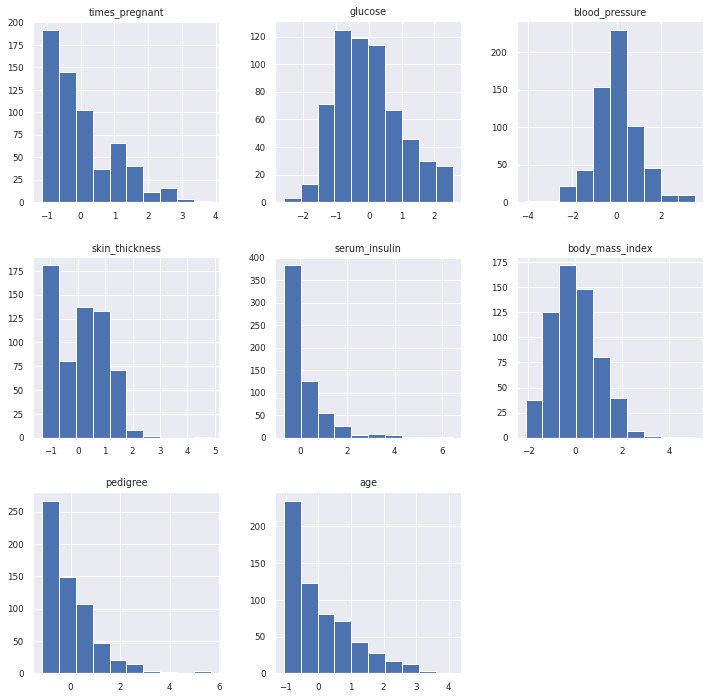

In [59]:
sc = StandardScaler()
# With standardized data, we also create new panda DataFrames with 
x_train = pd.DataFrame(sc.fit_transform(x_train),columns = x_columns)
x_val = pd.DataFrame(sc.transform(x_val),columns = x_columns)
x_train.hist(figsize=(12, 12));

In [61]:
# The objective of EarlyStopping callback is to Stop training when a monitored metric 
# has stopped improving.
# patience: Number of epochs with no improvement after which training will be stopped.
esm = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.01, verbose=1)

# create model
model = Sequential()
model.add(layers.Dense(12, input_dim=8, activation='relu'))
model.add(layers.Dense(8, activation='relu' ))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model by invoking fit() method. Note that we are passing training data and
# validation data. Object history will record the history of the training process.
history = model.fit(x_train.values, y_train.values, validation_data = \
(x_val.values, y_val.values), epochs=200, callbacks=[esm], batch_size=10, verbose=0)


Epoch 15: early stopping


In [62]:
y_train_pred = (model.predict(x_train) > 0.5).astype("int32")

In [64]:
cf_matrix = confusion_matrix(y_train,y_train_pred)

In [63]:
print(confusion_matrix(y_train,y_train_pred))
print('accuracy: ', accuracy_score(y_train,y_train_pred))
print('precision: ', precision_score(y_train,y_train_pred))
print('recall: ', recall_score(y_train,y_train_pred))

[[360  40]
 [ 90 124]]
accuracy:  0.7882736156351792
precision:  0.7560975609756098
recall:  0.5794392523364486


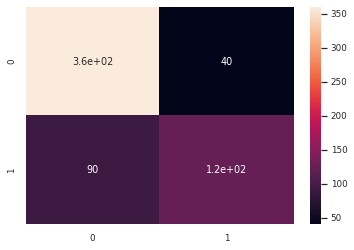

In [65]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

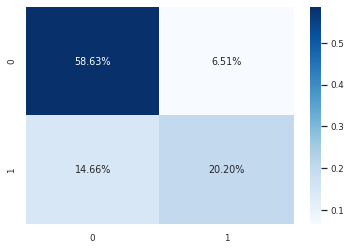

In [66]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

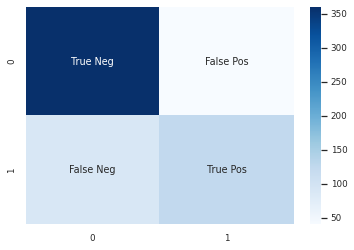

In [69]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

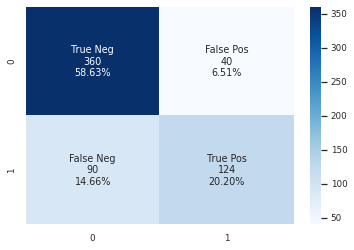

In [71]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [75]:
reviews_df = pd.read_excel('The_latest_reviews.xlsx', skiprows=[0])
reviews_df.columns = ['rating', 'movie', 'review']
reviews_df.head()

,rating,movie,review
0,-0.75,The Rookies,"""There's such passion behind this terrible scr..."
1,-1.00,What's Love Got To Do With It?,"""The two leads turn in powerful performances."""
2,0.25,Vanquish,"""A dud of a movie."""
3,-1.00,What's Love Got To Do With It?,"""As an actor's showcase, the film is a dream."""
4,-0.75,The Banishing,"""It's got some good scares. It's one of those ..."
